<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW04/Q2/HW04_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW04 : Problem 2

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW04

In [1]:
!wget -q https://github.com/MohammadRaziei/DataSetsArchive/raw/master/NWPU%20VHR-10%20dataset.zip -O 'NWPU VHR-10 dataset.zip'
!unzip -oq "NWPU VHR-10 dataset.zip" 
!rm -f "NWPU VHR-10 dataset.zip" 
print('dataset is ready to use :)')

dataset is ready to use :)


In [2]:
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/net.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/test.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/transform.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/prepare_data.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/visual_dataset.py

## Part O

In [3]:
from pprint import pprint
from visual_dataset import getGroundTruthList
pprint(getGroundTruthList(17))

[{(52,515),(152,594), airplane},
 {(233,393),(312,452), airplane},
 {(258,472),(333,529), airplane},
 {(272,546),(368,622), airplane},
 {(175,109),(258,187), airplane},
 {(463,9),(543,93), airplane},
 {(521,124),(618,197), airplane},
 {(451,229),(535,311), airplane},
 {(773,352),(856,425), airplane},
 {(891,282),(973,370), airplane},
 {(387,382),(443,429), storageTank},
 {(403,437),(459,478), storageTank},
 {(423,489),(475,527), storageTank},
 {(466,355),(530,403), storageTank},
 {(490,417),(555,467), storageTank},
 {(523,324),(588,374), storageTank},
 {(548,384),(614,437), storageTank},
 {(615,291),(673,332), storageTank},
 {(634,343),(693,383), storageTank},
 {(654,389),(711,435), storageTank}]


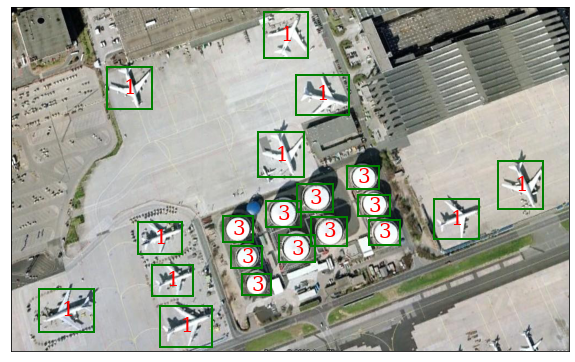

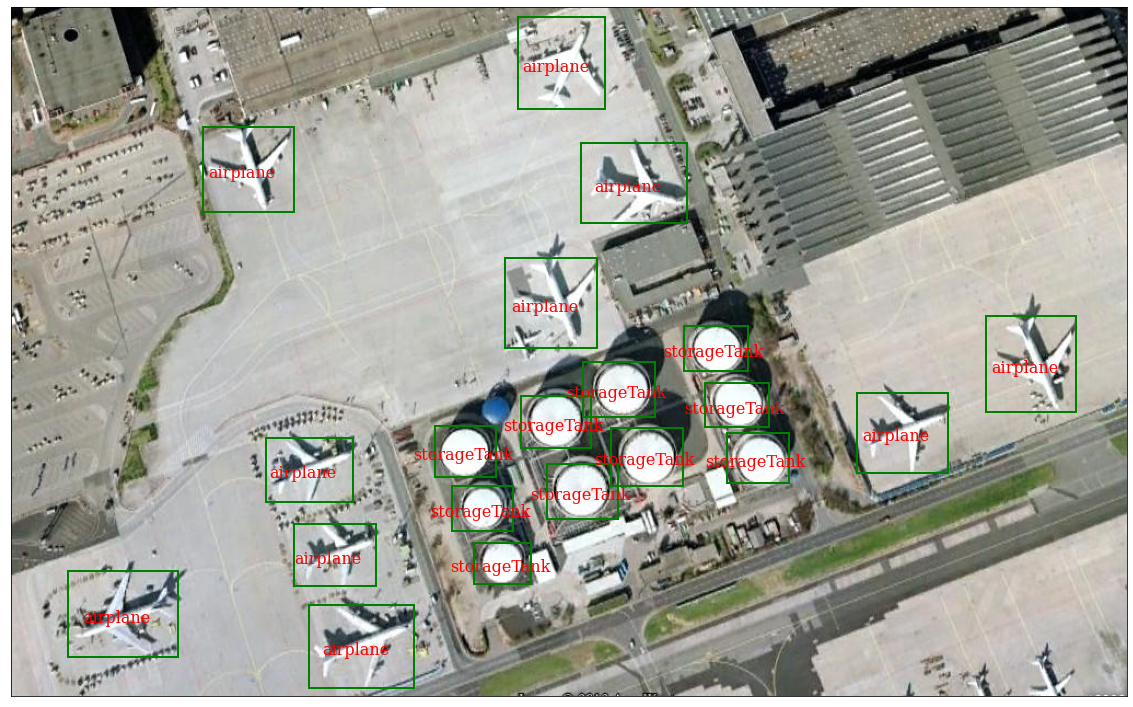

In [4]:
from visual_dataset import visual_dataset
visual_dataset(17, show_name=False, fontsize=20, figsize=(10,10))
visual_dataset(17)

## Part I

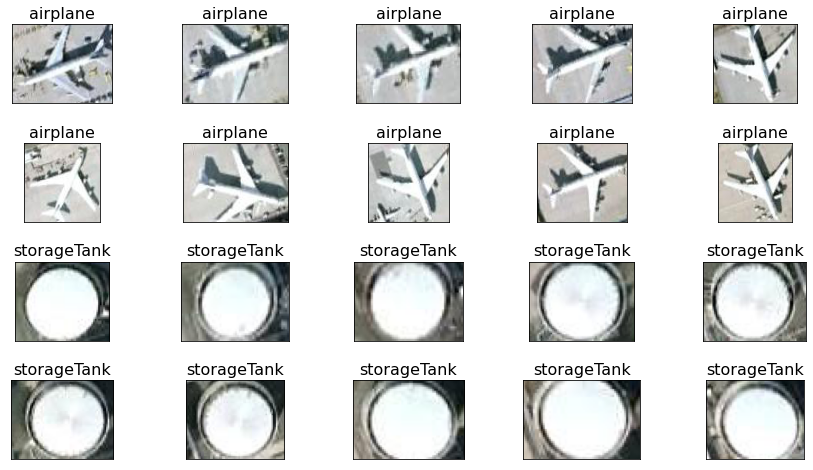

In [5]:
from prepare_data import prepare_data
import matplotlib.pyplot as plt


number = 17
cropped_images, classes = prepare_data(number)

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(cropped_images[i])
  plt.grid(False); plt.xticks([]); plt.yticks([])
  plt.title(classes[i].name, fontdict={'color':'black', 'fontsize':16})



In [6]:
categories = [cat.value for cat in classes]
categories 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

## Part II

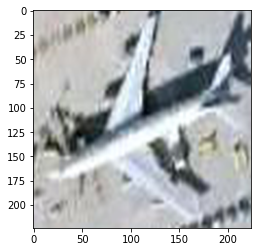

In [7]:
from PIL import Image
import numpy as np


def resize_image(image, target_size = (100,100)):
  img = Image.fromarray(image)
  img = img.resize(target_size, Image.ANTIALIAS)
  img = np.asarray(img)
  return img

img = cropped_images[0]
plt.imshow(resize_image(img, (224,224)))
plt.show()

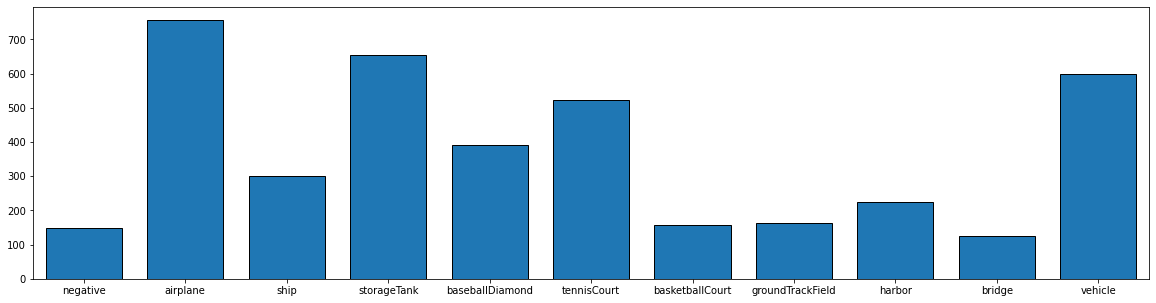

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from prepare_data import getGroundTruthList, ObjectType


number_of_labeled_files = len([name for name in os.listdir(os.path.join("NWPU VHR-10 dataset",'ground truth')) if name.endswith('.txt')])
number_of_nonlabeled_files = len([name for name in os.listdir(os.path.join("NWPU VHR-10 dataset",'negative image set')) if name.endswith('.jpg')])

number_of_files = len([name for name in os.listdir(os.path.join("NWPU VHR-10 dataset",'ground truth')) if name.endswith('.txt')])

all_classes = np.array([]);
for i in range(1,number_of_files):
  groundTruthList = getGroundTruthList(i)
  classes_i = np.array([obj.object_type.value for obj in groundTruthList])
  all_classes = np.concatenate((all_classes, classes_i), axis=0)
all_classes = np.concatenate((all_classes, np.zeros(number_of_nonlabeled_files)), axis=0)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


counts, bins = np.histogram(all_classes,bins=np.arange(-0.5,11.5), density=False)
P_removal = (counts - counts.min()) / counts

> make it balanced

Loading…: 100%|██████████████████████████| 649/649 [00:36<00:00, 18.00it/s]


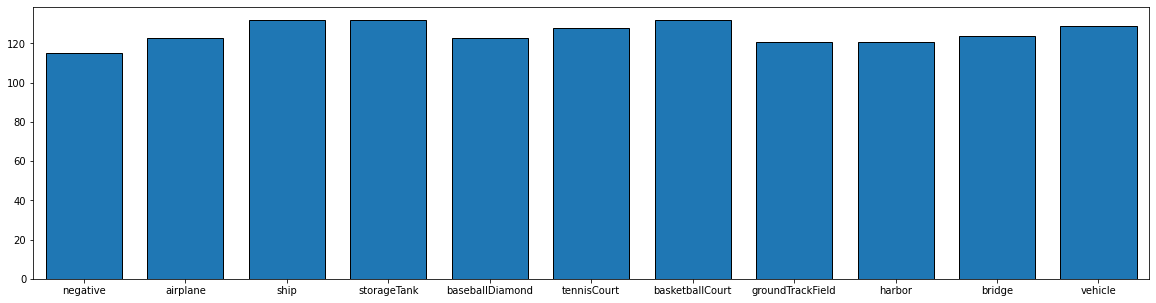

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
from prepare_data import getGroundTruthList, ObjectType

np.random.seed(0)
target_size = (224, 224)

all_classes = np.array([],dtype=np.uint8);
all_images = np.zeros((0,*target_size,3));
for i in tqdm(range(1,number_of_labeled_files), desc="Loading…",  ascii=False, ncols=75): 
    images_i, classes_i = prepare_data(i)
    classes_i = np.array([cat.value for cat in classes_i])
    index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
    len_i = classes_i.shape[0];
    classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
    if classes_i.shape[0] == 0: continue
    images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
     
    all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)
    all_classes = np.concatenate((all_classes, classes_i), axis=0)

classes_i = np.zeros(number_of_nonlabeled_files, dtype=np.int64)
images_i = [(plt.imread(os.path.join('NWPU VHR-10 dataset','negative image set','{:03.0f}.jpg'.format(i+1)))) for i in range(number_of_nonlabeled_files)]
len_i = classes_i.shape[0]
index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
if classes_i.shape[0] > 0:
  images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
  all_classes = np.concatenate((all_classes,classes_i), axis=0)
  all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)


plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


## Part III

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

all_categories = to_categorical(all_classes)
all_image_data = all_images.astype(np.float)/255.
x_train, x_test, y_train, y_test = train_test_split(all_image_data, all_categories, test_size = 0.2, shuffle=True) 
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True) 

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

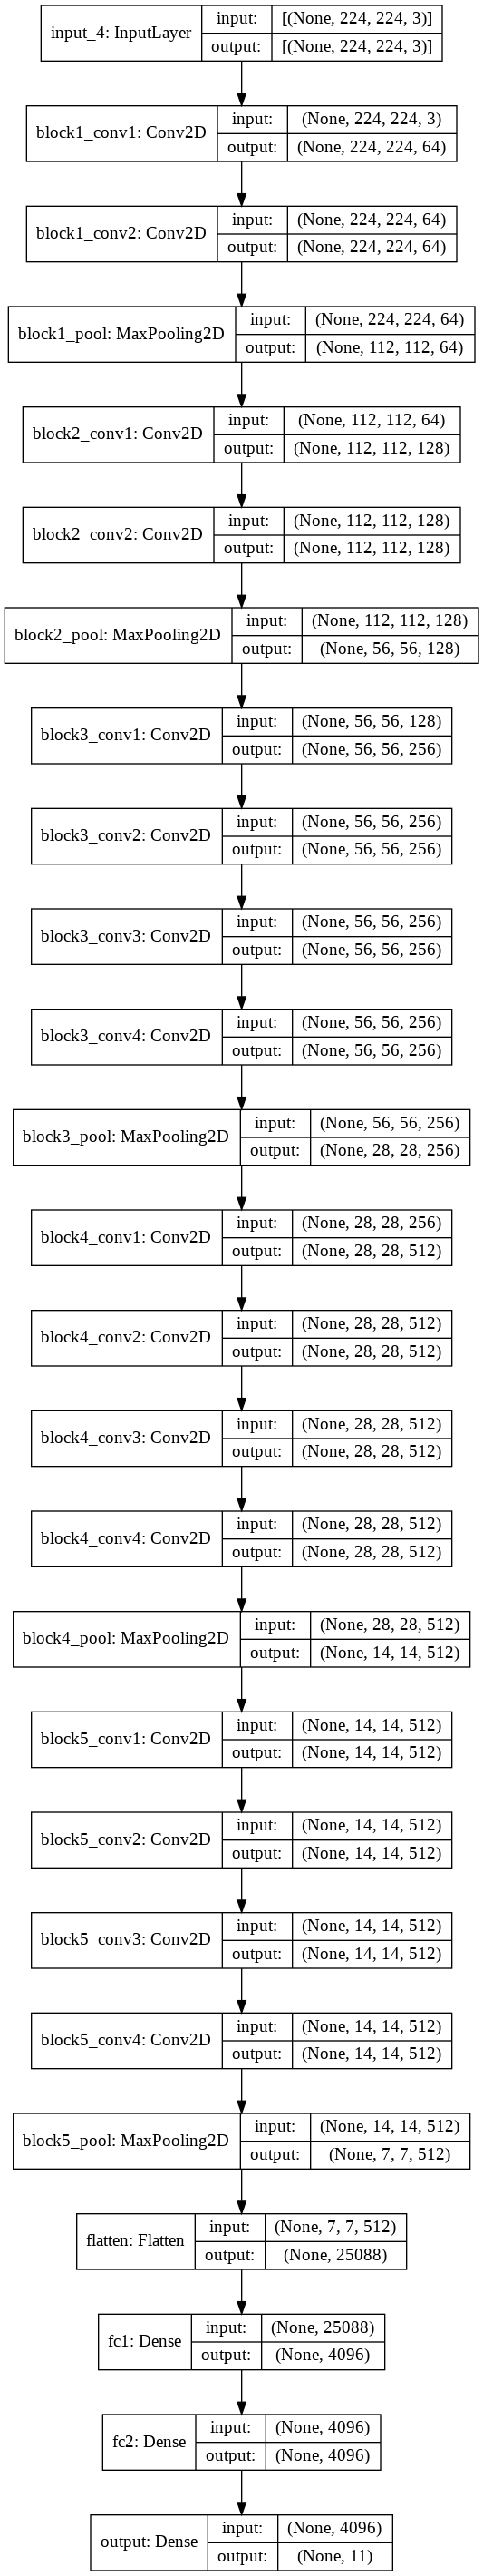

In [18]:
# from tesorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense
# load the model
pre_model = VGG19(weights='imagenet')
output = Dense(11,  activation='softmax', name='output')(pre_model.layers[-2].output)
pre_model = Model(inputs=pre_model.inputs, outputs=output)
pre_model.summary()
plot_model(pre_model, show_shapes=True)


In [21]:
# !pip install keras_tqdm
# from keras_tqdm import TQDMNotebookCallback
# from tqdm.keras import TqdmCallback

pre_model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = pre_model.fit(x_subtrain,
                    y_subtrain,
                    epochs=50,
                    verbose=2,
                    # callbacks=[TqdmCallback(verbose=2)],
                    # callbacks=[TQDMNotebookCallback(leave_inner=True)],
                    validation_data=(x_valid, y_valid),
                    batch_size=16
                    )

# save model and architecture to single file
pre_model.save("net.h5")
print("Saved model to disk")


Epoch 1/50
56/56 - 17s - loss: 1.2425 - accuracy: 0.6308 - val_loss: 1.1397 - val_accuracy: 0.6335
Epoch 2/50
56/56 - 17s - loss: 0.7636 - accuracy: 0.7418 - val_loss: 1.1165 - val_accuracy: 0.6380
Epoch 3/50
56/56 - 16s - loss: 0.6202 - accuracy: 0.7860 - val_loss: 1.4789 - val_accuracy: 0.5475
Epoch 4/50
56/56 - 16s - loss: 0.5047 - accuracy: 0.8335 - val_loss: 1.2445 - val_accuracy: 0.7059
Epoch 5/50
56/56 - 16s - loss: 0.5026 - accuracy: 0.8279 - val_loss: 1.0281 - val_accuracy: 0.7240
Epoch 6/50
56/56 - 16s - loss: 0.3439 - accuracy: 0.8901 - val_loss: 1.2957 - val_accuracy: 0.7240
Epoch 7/50
56/56 - 16s - loss: 0.3502 - accuracy: 0.8913 - val_loss: 1.2895 - val_accuracy: 0.6606
Epoch 8/50
56/56 - 16s - loss: 0.4015 - accuracy: 0.8743 - val_loss: 1.4241 - val_accuracy: 0.6968
Epoch 9/50
56/56 - 16s - loss: 0.4247 - accuracy: 0.8686 - val_loss: 1.2128 - val_accuracy: 0.6968
Epoch 10/50
56/56 - 16s - loss: 0.3103 - accuracy: 0.8969 - val_loss: 1.3649 - val_accuracy: 0.7421
Epoch 11/

In [25]:
# from tesorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense
# load the model
pre_model = InceptionResNetV2(weights='imagenet')
output = Dense(11,  activation='softmax', name='output')(pre_model.layers[-2].output)
pre_model = Model(inputs=pre_model.inputs, outputs=output)
pre_model.summary()
plot_model(pre_model, show_shapes=True)

225214464/225209952 [==============================] - 2s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_________________________

In [ ]:
pre_model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = pre_model.fit(x_subtrain,
                    y_subtrain,
                    epochs=50,
                    verbose=2,
                    # callbacks=[TqdmCallback(verbose=2)],
                    # callbacks=[TQDMNotebookCallback(leave_inner=True)],
                    validation_data=(x_valid, y_valid),
                    batch_size=16
                    )

# save model and architecture to single file
pre_model.save("pre_model.h5")
print("Saved model to disk")


In [ ]:
# redefine model to output right after the first hidden layer
feature_layer_index = len(model.layers)-2 # FC2
model = Model(inputs=model.inputs, outputs=model.layers[feature_layer_index].output)